<a href="https://colab.research.google.com/github/aesnin12/DATA103Project/blob/main/DATA103_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data103

1. On the assumption na alcohol does impact grades, what combination of features would result in worse and best results
2. We want to know yung diff processes each algo does, how they place importance on a feature, qnd yung learning pattern nta

In [15]:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import plotly.express as px
    from sklearn.model_selection import train_test_split, cross_val_score, KFold
    from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC, LinearSVC
    from sklearn.preprocessing import LabelEncoder, StandardScaler
    from sklearn.feature_selection import f_classif
    # from google.colab import drive
    # from google.colab import files


In [16]:
d1 = pd.read_csv("student-mat.csv", sep=",")
d2 = pd.read_csv("student-por.csv", sep=",")

merge_columns = ["school", "sex", "age", "address", "famsize", "Pstatus",
                 "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"]

d3 = pd.merge(d1, d2, on=merge_columns, suffixes=('_mat', '_por'))
print(len(d3))
print(d3)

382
    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
377     MS   F   18       U     LE3       T     3     1   teacher  services   
378     MS   F   18       U     GT3       T     1     1     other     other   
379     MS   F   18       U     GT3       T     1     1     other     other   
380     MS   M   17       U     LE3       T     3     1  services  services   
381     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel_por freetime_por  goout_por  Da

In [17]:
d3['G3'] = d3[['G3_mat', 'G3_por']].mean(axis=1).round()
d3['pass'] = d3['G3'].apply(lambda x: 1 if x >= 11 else 0)

# print(d3.isnull().sum())

features = ['Dalc_mat', 'Walc_mat', 'absences_mat', 'studytime_mat', 'goout_mat', 'higher_mat', 'famsup_mat', 'romantic_mat', 'failures_mat', 'famrel_mat', 'schoolsup_mat']
df = d3[features + ['pass']].copy()
df['higher_mat'] = df['higher_mat'].map({'yes': 1, 'no': 0})
df['famsup_mat'] = df['famsup_mat'].map({'yes': 1, 'no': 0})
df['romantic_mat'] = df['romantic_mat'].map({'yes': 1, 'no': 0})
df['schoolsup_mat'] = df['schoolsup_mat'].map({'yes': 1, 'no': 0})

print(df.isnull().sum())

Dalc_mat         0
Walc_mat         0
absences_mat     0
studytime_mat    0
goout_mat        0
higher_mat       0
famsup_mat       0
romantic_mat     0
failures_mat     0
famrel_mat       0
schoolsup_mat    0
pass             0
dtype: int64


higher_mat
higher_mat
1    364
0     18
Name: count, dtype: int64

famsup_mat
famsup_mat
1    238
0    144
Name: count, dtype: int64



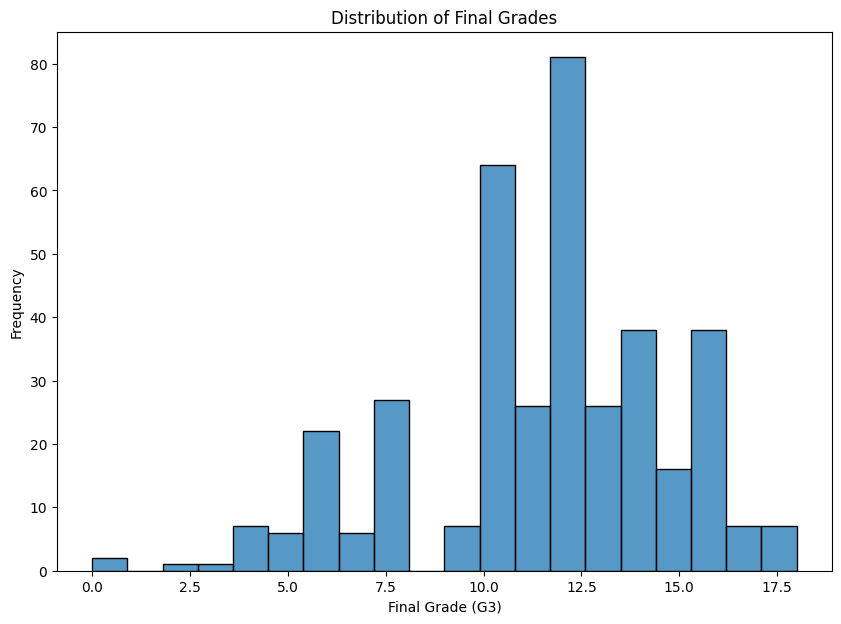

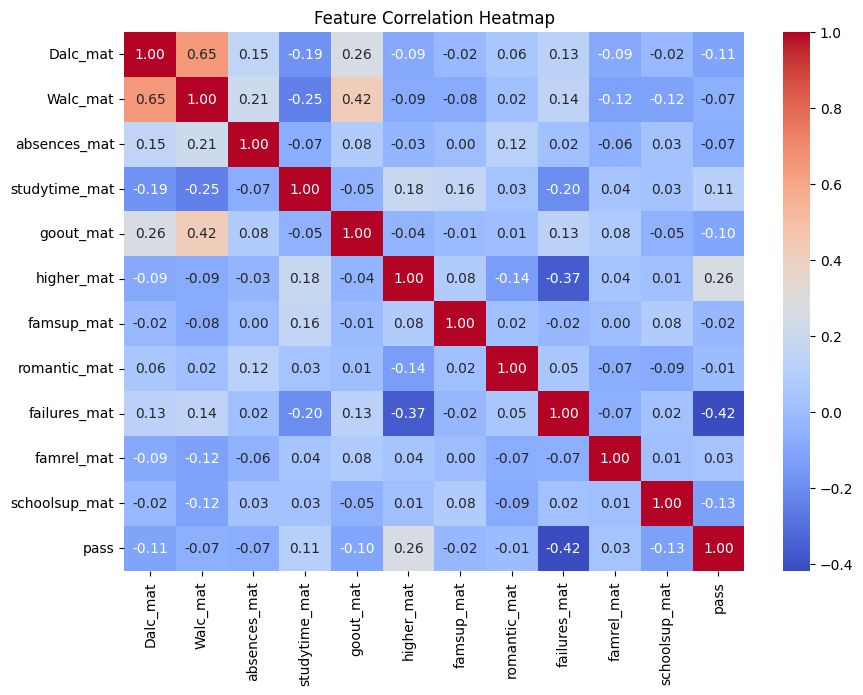

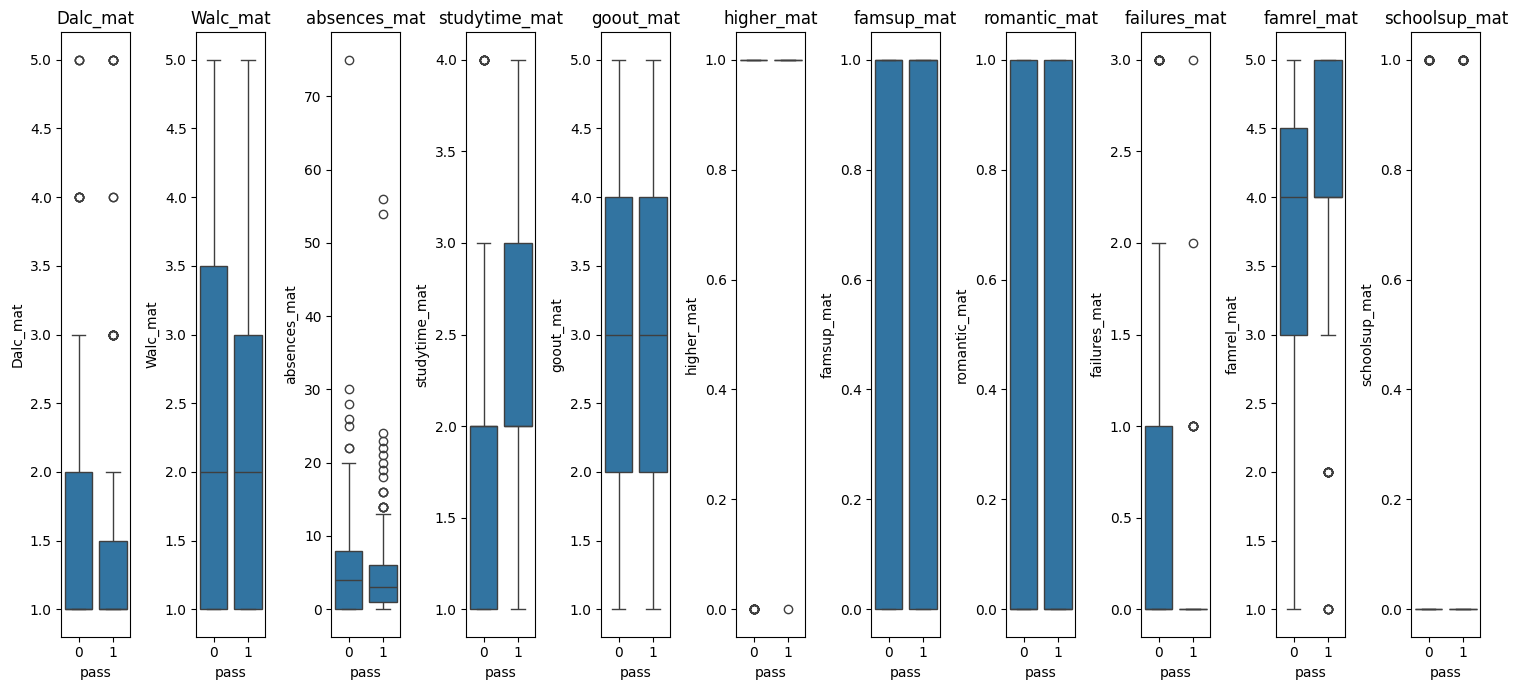

In [18]:
X = df.drop('pass', axis=1)
y = df['pass']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
for col in ['higher_mat', 'famsup_mat']:
    print(col)
    print(df[col].value_counts())
    print()
# Exploratory Data Analysis
plt.figure(figsize=(10, 7))
sns.histplot(d3['G3'], bins=20)
plt.title("Distribution of Final Grades")
plt.xlabel("Final Grade (G3)")
plt.ylabel("Frequency")
plt.show()

# Heatmap for correlation
plt.figure(figsize=(10, 7))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Boxplot of features by pass/fail
plt.figure(figsize=(15, 7))
for idx, col in enumerate(X.columns):
    plt.subplot(1, len(X.columns), idx + 1)
    sns.boxplot(x='pass', y=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()
# based on graph below higher_mat and famsup_mat are not good predictors


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


Logistic Regression
              precision    recall  f1-score   support

           0       0.78      0.48      0.60        29
           1       0.75      0.92      0.82        48

    accuracy                           0.75        77
   macro avg       0.76      0.70      0.71        77
weighted avg       0.76      0.75      0.74        77



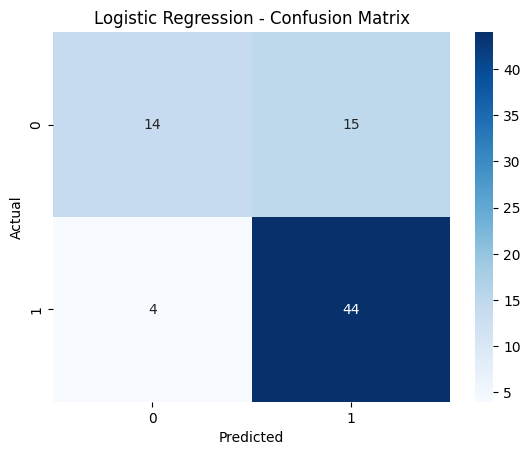

In [20]:
print("\nLogistic Regression")
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print(classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



              precision    recall  f1-score   support

           0     0.7037    0.5315    0.6056       143
           1     0.7555    0.8661    0.8070       239

    accuracy                         0.7408       382
   macro avg     0.7296    0.6988    0.7063       382
weighted avg     0.7361    0.7408    0.7316       382



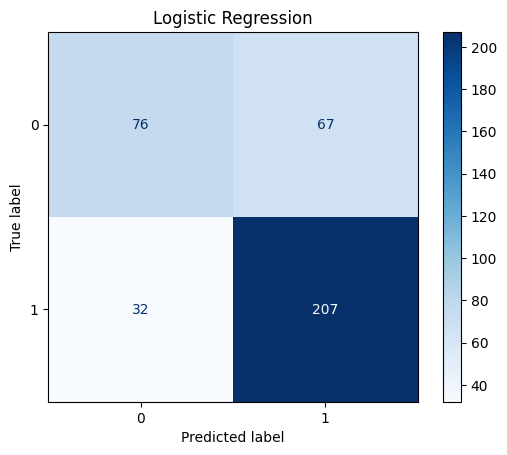

In [21]:
# using KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
y_true_all = []
y_pred_all = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = LogisticRegression(class_weight='balanced', max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)

print(classification_report(y_true_all, y_pred_all, digits=4))

# Combined confusion matrix across all folds
cm = confusion_matrix(y_true_all, y_pred_all)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Logistic Regression")
plt.show()


Random Forest
              precision    recall  f1-score   support

           0       0.86      0.56      0.68        34
           1       0.72      0.93      0.81        42

    accuracy                           0.76        76
   macro avg       0.79      0.74      0.75        76
weighted avg       0.79      0.76      0.75        76



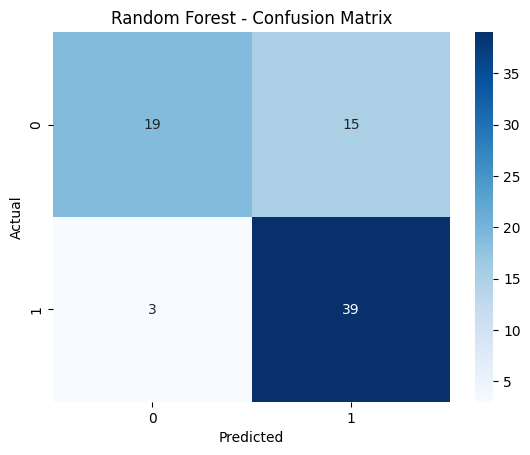

In [22]:
print("\nRandom Forest")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

              precision    recall  f1-score   support

           0     0.7196    0.5385    0.6160       143
           1     0.7600    0.8745    0.8132       239

    accuracy                         0.7487       382
   macro avg     0.7398    0.7065    0.7146       382
weighted avg     0.7449    0.7487    0.7394       382



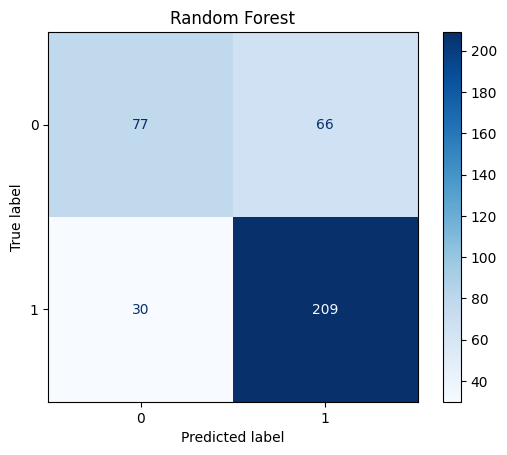

In [23]:
# using KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
y_true_all = []
y_pred_all = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = RandomForestClassifier(class_weight='balanced', n_estimators=1000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)

print(classification_report(y_true_all, y_pred_all, digits=4))

# Combined confusion matrix across all folds
cm = confusion_matrix(y_true_all, y_pred_all)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Random Forest")
plt.show()


Support Vector Machine (SVM)
              precision    recall  f1-score   support

           0       0.89      0.47      0.62        34
           1       0.69      0.95      0.80        42

    accuracy                           0.74        76
   macro avg       0.79      0.71      0.71        76
weighted avg       0.78      0.74      0.72        76



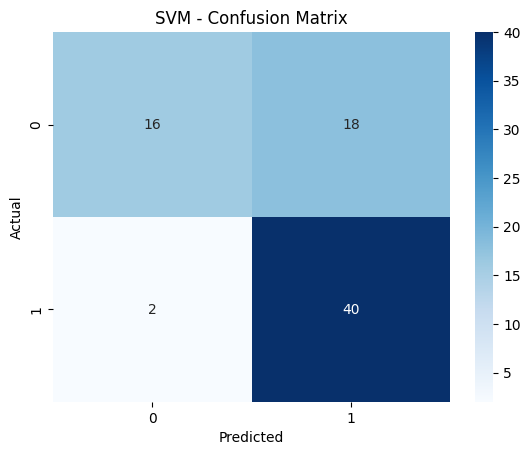

In [24]:
print("\nSupport Vector Machine (SVM)")
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print(classification_report(y_test, y_pred_svm))

cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


              precision    recall  f1-score   support

           0     0.6393    0.5455    0.5887       143
           1     0.7500    0.8159    0.7816       239

    accuracy                         0.7147       382
   macro avg     0.6947    0.6807    0.6851       382
weighted avg     0.7086    0.7147    0.7094       382



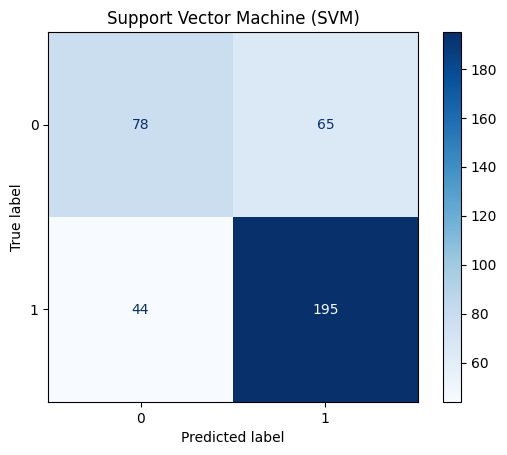

In [25]:
# using KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
y_true_all = []
y_pred_all = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = SVC(class_weight='balanced', kernel='rbf', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)

print(classification_report(y_true_all, y_pred_all, digits=4))

# Combined confusion matrix across all folds
cm = confusion_matrix(y_true_all, y_pred_all)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Support Vector Machine (SVM)")
plt.show()

In [33]:
# Multivariate Analysis 
print("\n ANOVA F-test")
f_stat, p_val = f_classif(X, y)
for i, col in enumerate(X.columns):
    print(f"{col}: F={f_stat[i]:.2f}, p={p_val[i]:.4f}")

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_scaled, y)
print("\nLogistic Regression Coefficients:")
for feature, coef in zip(X.columns, lr.coef_[0]):
    print(f"{feature}: {coef:.4f}")
df_lr = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_[0]
})
fig = px.bar(df_lr, x='Feature', y='Coefficient', title='Logistic Regression Coefficients', color='Coefficient')
fig.show()


# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled, y)
importances_rf = rf.feature_importances_
print("Random Forest Feature Importances:")
for feature, importance in zip(X.columns, importances_rf):
    print(f"{feature}: {importance:.4f}")

df_rf = pd.DataFrame({
    'Feature': X.columns, 
    'Importance': importances_rf
})
px.bar(df_rf, x='Feature', y='Importance', title='Random Forest Feature Importance').show()

# Linear SVM
clf_svm = LinearSVC()
clf_svm.fit(X_scaled, y)  # scale input for better performance
print("\nLinear SVM Coefficients:")
for feature, coef in zip(X.columns, clf_svm.coef_[0]):
    print(f"{feature}: {coef:.4f}")

# SVM Coefficients Bar Plot
df_svm = pd.DataFrame({
    'Feature': X.columns, 
    'Coefficient': clf_svm.coef_[0]
})
df_svm['AbsCoefficient'] = df_svm['Coefficient'].abs()
df_svm.sort_values(by='AbsCoefficient', ascending=False, inplace=True)
px.bar(df_svm, x='Feature', y='Coefficient', title='Linear SVM Coefficients').show()


 ANOVA F-test
Dalc_mat: F=4.78, p=0.0293
Walc_mat: F=1.73, p=0.1892
absences_mat: F=1.98, p=0.1603
studytime_mat: F=4.49, p=0.0348
goout_mat: F=4.22, p=0.0406
higher_mat: F=28.00, p=0.0000
famsup_mat: F=0.17, p=0.6786
romantic_mat: F=0.03, p=0.8733
failures_mat: F=80.97, p=0.0000
famrel_mat: F=0.38, p=0.5371
schoolsup_mat: F=6.11, p=0.0139

Logistic Regression Coefficients:
Dalc_mat: -0.1490
Walc_mat: 0.1604
absences_mat: -0.0977
studytime_mat: 0.0337
goout_mat: -0.1519
higher_mat: 0.5763
famsup_mat: -0.0839
romantic_mat: 0.1017
failures_mat: -1.2048
famrel_mat: -0.0095
schoolsup_mat: -0.2703


Random Forest Feature Importances:
Dalc_mat: 0.0579
Walc_mat: 0.0979
absences_mat: 0.1879
studytime_mat: 0.0947
goout_mat: 0.1229
higher_mat: 0.0337
famsup_mat: 0.0450
romantic_mat: 0.0499
failures_mat: 0.1725
famrel_mat: 0.0948
schoolsup_mat: 0.0428



Linear SVM Coefficients:
Dalc_mat: -0.0663
Walc_mat: 0.0716
absences_mat: -0.0425
studytime_mat: 0.0149
goout_mat: -0.0626
higher_mat: 0.2359
famsup_mat: -0.0354
romantic_mat: 0.0374
failures_mat: -0.4808
famrel_mat: -0.0030
schoolsup_mat: -0.1143
